# DATA ANALYSIS and VISUALIZATION

In [98]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import preprocessor as p
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS
import re
import string
#from mpl_toolkits.basemap import Basemap
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from datetime import datetime


In [195]:
#Opening my raw JSON Files. JSON files used are 7,8,9,10,11,13,14,16,19,20,21,22,23
import json
tweets_data23 = []

# Open connection to file
with open('sample_tweets23.json', 'r') as tweets_file:
    # Read in tweets and store in list
    for line in tweets_file:
        tweet = json.loads(line)
        tweets_data23.append(tweet)

In [196]:
#function to determine retweets
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

In [197]:
#function to determine replies
def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

In [198]:
# function to determin device of tweeters
def reckondevice(tweet):
    if 'iPhone' in tweet['source'] or ('iOS' in tweet['source']):
        return 'iPhone'
    elif 'Android' in tweet['source']:
        return 'Android'
    elif 'Mobile' in tweet['source'] or ('App' in tweet['source']):
        return 'Mobile device'
    elif 'Mac' in tweet['source']:
        return 'Mac'
    elif 'Windows' in tweet['source']:
        return 'Windows'
    elif 'Bot' in tweet['source']:
        return 'Bot'
    elif 'Web' in tweet['source']:
        return 'Web'
    elif 'Instagram' in tweet['source']:
        return 'Instagram'
    elif 'Blackberry' in tweet['source']:
        return 'Blackberry'
    elif 'iPad' in tweet['source']:
        return 'iPad'
    elif 'Foursquare' in tweet['source']:
        return 'Foursquare'
    else:
        return '-'

In [199]:
#Transforming into a DATAFRAME for analysis 
tweets23 = pd.DataFrame()
tweets23['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data23))
tweets23['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data23))
tweets23['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data23))
tweets23['lenght'] = list(map(lambda tweet: len(tweet['text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']) , tweets_data23))
tweets23['location'] = list(map(lambda tweet: tweet['user']['location'], tweets_data23))
tweets23['device'] = list(map(reckondevice, tweets_data23))
tweets23['RT'] = list(map(is_RT, tweets_data23))
tweets23['Reply'] = list(map(is_Reply_to, tweets_data23))



In [226]:
#combining both data
tweets= pd.concat([tweets7, tweets8, tweets9,tweets10,tweets11, 
                tweets13, tweets14, tweets16, tweets19, tweets20, tweets21, tweets22, tweets23])

In [234]:
tweets

,text,Username,Timestamp,lenght,location,device,RT,Reply
0,RT @NWOMXNDX: Niggas posting chicken sandwiche...,Asshole_Cole,Sun Nov 03 21:53:10 +0000 2019,98,"San Marcos, TX",iPhone,True,None
1,RT @Rubronegro_81: Fla 3x1 Gre\nVas 1x4 Fla\nC...,LucasGomesCRF,Sun Nov 03 21:53:11 +0000 2019,140,021,Android,True,None
2,RT @sallyKP: ALL THREE SIBLINGS HAD THE FLU VA...,chops7367,Sun Nov 03 21:53:15 +0000 2019,140,None,Android,True,None
3,RT @Rubronegro_81: Fla 3x1 Gre\nVas 1x4 Fla\nC...,claraxcrf,Sun Nov 03 21:53:17 +0000 2019,140,sjm,Android,True,None
4,RT @dongsyong: me inscrevendo na vaga de empre...,yixingoals,Sun Nov 03 21:53:17 +0000 2019,115,L-1485 ♡ 4419 🐺 × 🐿,Android,True,None
...,...,...,...,...,...,...,...,...
996,RT @vaxxaware: Settlement reached in swine flu...,dragnesdc,Thu Nov 21 02:48:21 +0000 2019,125,"Valencia, PA",iPhone,True,None
997,❗️❗️❗️TLDR: -do you really need the ER because...,cadetkimkims,Thu Nov 21 02:48:27 +0000 2019,237,None,iPhone,False,None
998,People need to know. Big pharma is evil.,Terabites2,Thu Nov 21 02:48:27 +0000 2019,40,AZ,iPad,False,None
999,RT @thephillyvoice: Antibiotics were not desig...,G4474Denise,Thu Nov 21 02:48:27 +0000 2019,140,"Philadelphia, PA",iPhone,True,None


In [252]:
#How many retweets?
RT_tweets = tweets[tweets['RT'] == True]
print('The percentage of retweets is {}%'.format(round(len(RT_tweets)/len(tweets)*100)))

The percentage of retweets is 50%


In [225]:
#How many replies?
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of reply tweet is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of reply tweet is 16% of all the tweets


In [254]:
#How many mentions?
mention_tweets = tweets[~tweets['text'].str.contains("RT")  & tweets['text'].str.contains("@")]
print(f"The percentage of retweets is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of retweets is 17% of all the tweets


In [256]:
#See how many tweets inside are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@")  & ~tweets['text'].str.contains("RT")]
print(f"The percentage of plain text tweet is {round(len(plain_text_tweets)/len(tweets)*10)}% of all the tweets")

The percentage of plain text tweet is 3% of all the tweets


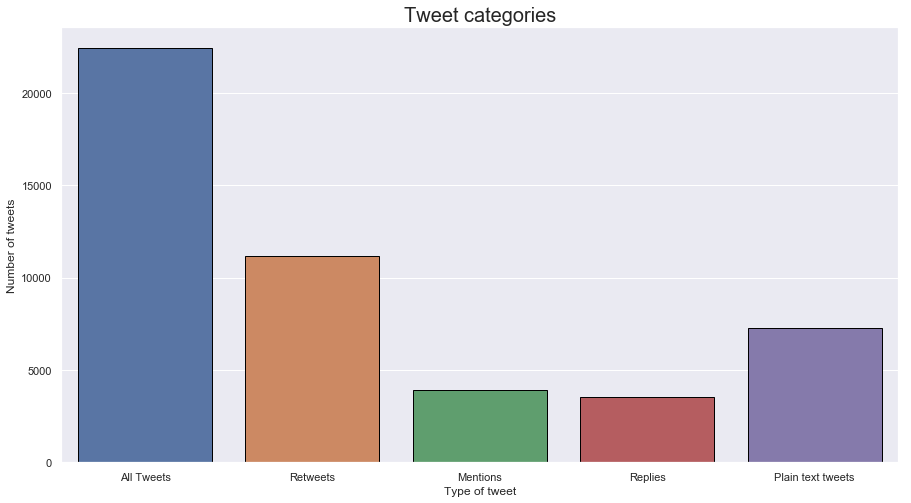

In [257]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [ len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
plt.title('Tweet categories', fontsize = 20)
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x = item_list, y = len_list,  edgecolor = 'black', linewidth=1)

plt.show()

In [258]:
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(tweets['text'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [259]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

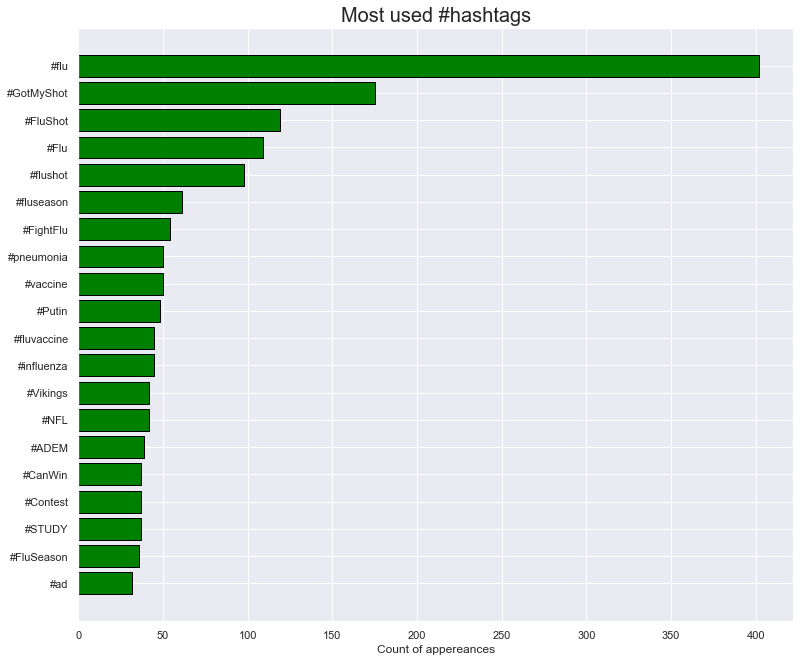

In [268]:
import numpy as np
fig, ax = plt.subplots(figsize = (12,10))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[::-1], align='center', color = 'green', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[::-1])
ax.set_xlabel("Count of appereances")
ax.set_title("Most used #hashtags", fontsize = 20)
plt.tight_layout(pad=3)
plt.show()

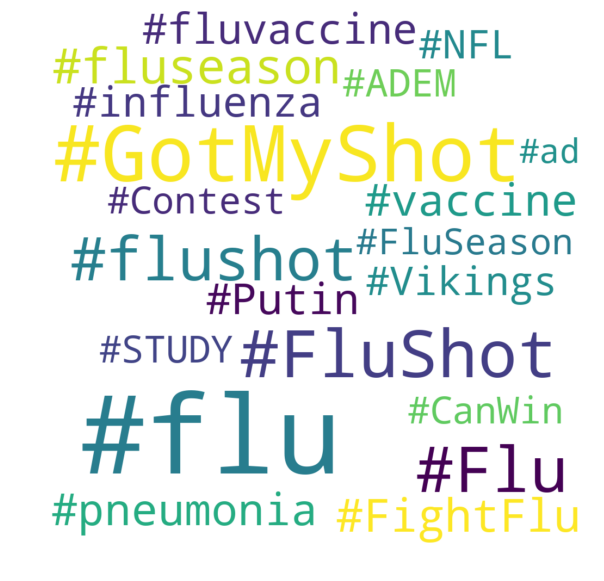

In [261]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:20]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

In [262]:
#look at how long tweets are
tweets['count']=tweets.text.str.len()

In [263]:
tweets.head()

,text,Username,Timestamp,lenght,location,device,RT,Reply,count
0,RT @NWOMXNDX: Niggas posting chicken sandwiche...,Asshole_Cole,Sun Nov 03 21:53:10 +0000 2019,98,"San Marcos, TX",iPhone,True,None,98
1,RT @Rubronegro_81: Fla 3x1 Gre\nVas 1x4 Fla\nC...,LucasGomesCRF,Sun Nov 03 21:53:11 +0000 2019,140,021,Android,True,None,140
2,RT @sallyKP: ALL THREE SIBLINGS HAD THE FLU VA...,chops7367,Sun Nov 03 21:53:15 +0000 2019,140,None,Android,True,None,140
3,RT @Rubronegro_81: Fla 3x1 Gre\nVas 1x4 Fla\nC...,claraxcrf,Sun Nov 03 21:53:17 +0000 2019,140,sjm,Android,True,None,140
4,RT @dongsyong: me inscrevendo na vaga de empre...,yixingoals,Sun Nov 03 21:53:17 +0000 2019,115,L-1485 ♡ 4419 🐺 × 🐿,Android,True,None,115
